# Introduction

The notebook is intended to show Seaborn plot examples.

In [1]:
# Import Standard Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
data = sns.load_dataset('titanic')

In [3]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Theme

In [4]:
# Define Seaborn theme parameters
theme_parameters =  {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'font.family': 'Andale Mono',
    'axes.titlesize': 24,
    'figure.facecolor': '#E5E8E8',
    'axes.facecolor': '#E5E8E8'
}

# Set the theme
sns.set_theme(style='whitegrid',
              palette=sns.color_palette('deep'), 
              rc=theme_parameters)

# Plots

## Counterplot

It is used for discrete variables.

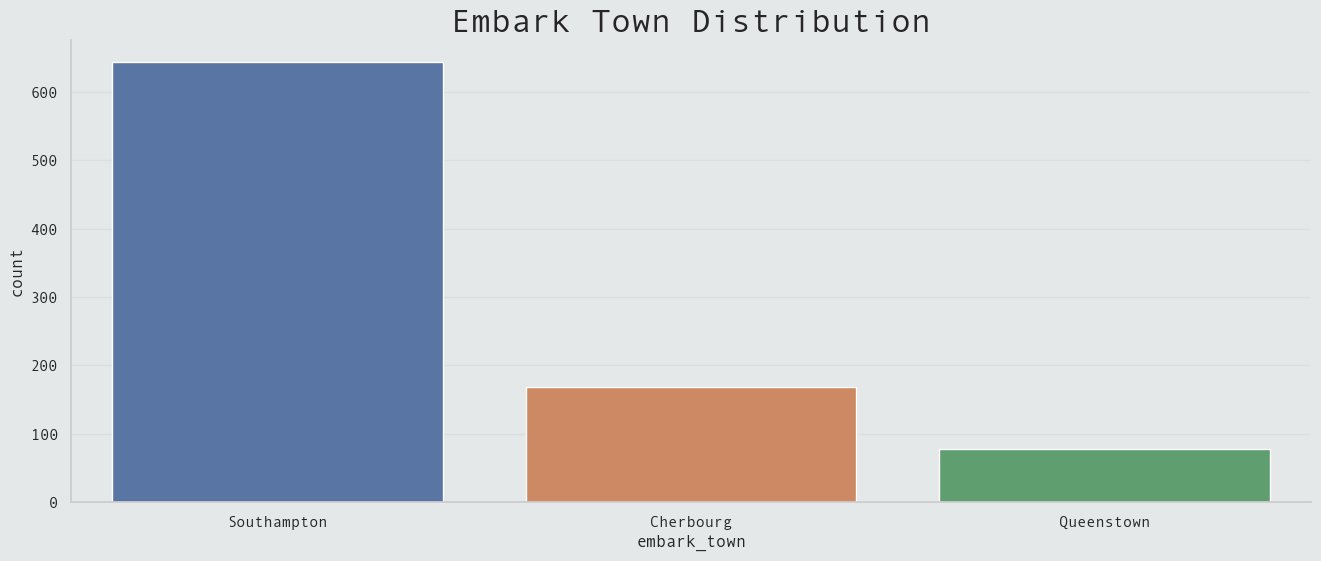

In [11]:
# Plot 'counterplot' of 'embark_town'
ax = sns.countplot(data=data, 
                   x='embark_town')
ax.set_title('Embark Town Distribution')
plt.show()

## Barplot

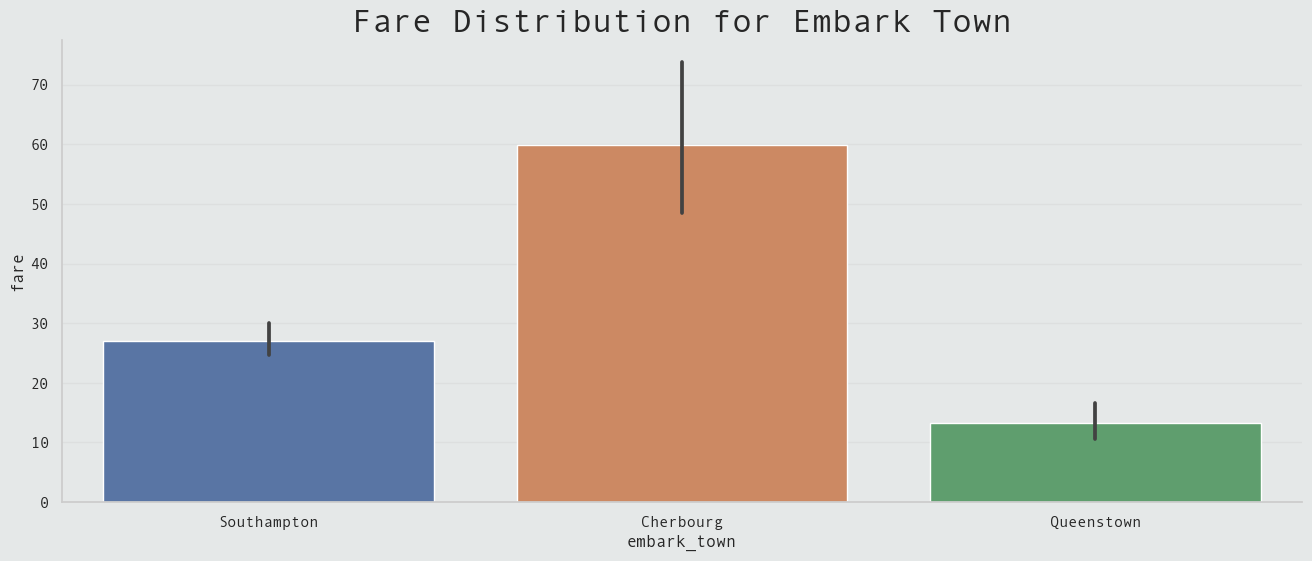

In [13]:
# Plot 'barplot' of 'fare' for 'embark_town'
ax = sns.barplot(data=data, 
                 x='embark_town', 
                 y='fare', 
                 hue=')
ax.set_title('Fare Distribution for Embark Town')
plt.show()

## Histogram

Is is used for continuos variables.

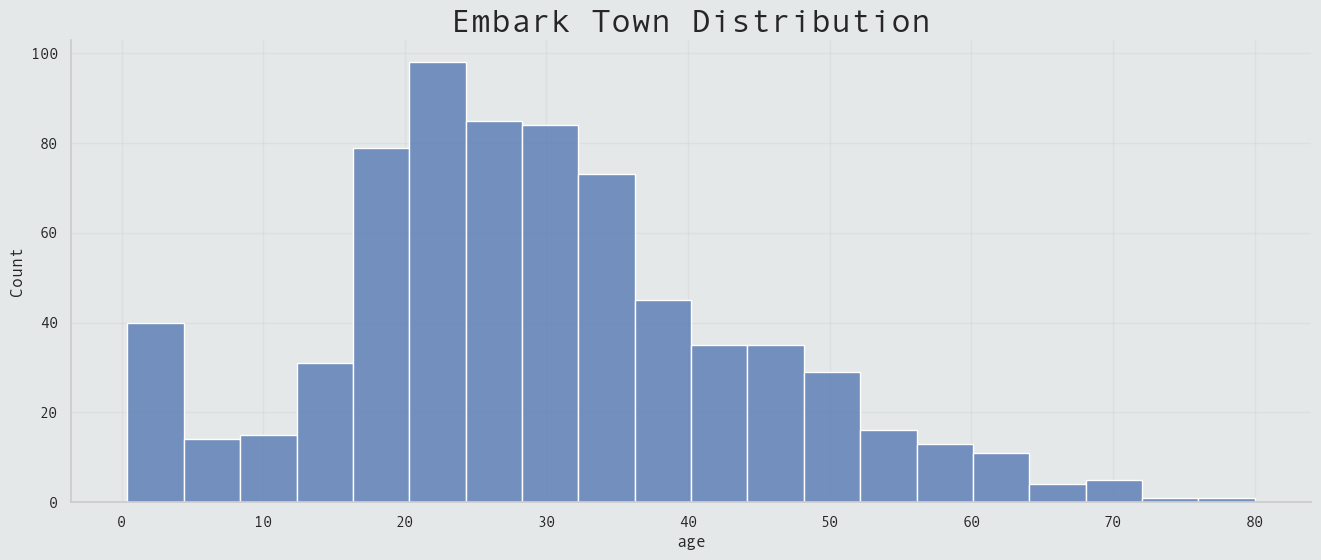

In [12]:
ax = sns.histplot(data=data, 
                  x='age')
ax.set_title('Embark Town Distribution')
plt.show()

# Utils

## Null Values Percentage